In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 300)
(7000,)
(3000, 300)
(3000,)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [5]:
def cross_validation(X_train, shuffle=True, k=5, random_state=35):
    n_samples = X_train.shape[0]
    indices = np.arange(n_samples)
    if shuffle:
        rstate = np.random.RandomState(random_state)
        rstate.shuffle(indices)
    n_splits = k
    fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=int)
    fold_sizes[: n_samples % n_splits] += 1
    KFold = []
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        
        # get_test_mask function content merged into cross_validation
        test_index = indices[start:stop]
        test_mask = np.zeros(n_samples, dtype=bool)
        test_mask[test_index] = True
        
        train_index = indices[np.logical_not(test_mask)]
        test_index = indices[test_mask]
        # error = [x for x in train_index if x in test_index]
        # print(len(error))
        KFold.append([train_index, test_index])
        current = stop
    return KFold


In [6]:
kfold_data = cross_validation(x_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [7]:
def gridsearch(x, y, kfold_data, candidate_C, candidate_gamma):
    history = []
    max_acc = 0
    n_gamma = len(candidate_gamma)
    candidate = [(c, g) for c in candidate_C for g in candidate_gamma]
    tmp_acc = []

    for i, (c, g) in enumerate(candidate):
        avg_acc = 0

        for j, (train, test) in enumerate(kfold_data):
            clf = SVC(C=c, kernel='rbf', gamma=g)
            clf.fit(x[train], y[train])
            y_pred = clf.predict(x[test])
            acc = accuracy_score(y[test], y_pred)
            avg_acc += acc

        avg_acc /= len(kfold_data)
        tmp_acc.append(avg_acc)
        
        if avg_acc > max_acc:
            best_C = c
            best_gamma = g
            max_acc = avg_acc

        if (i + 1) % n_gamma == 0:
            history.append(tmp_acc)
            tmp_acc = []

    return np.asarray(history), (best_C, best_gamma)

candidate_C = np.logspace(-4, 4, num=9)
candidate_gamma = np.logspace(-4, 4, num=9)
history, best_parameters = gridsearch(x_train, y_train, kfold_data, candidate_C, candidate_gamma)
print(f'Best parameters (C, gamma): {best_parameters}')

Best parameters (C, gamma): (1.0, 0.0001)


In [8]:
candidate_C = np.logspace(-4, 4, num= 9)
candidate_gamma = np.logspace(-4, 4, num= 9)
print(candidate_C)
print(candidate_gamma)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


# Q3

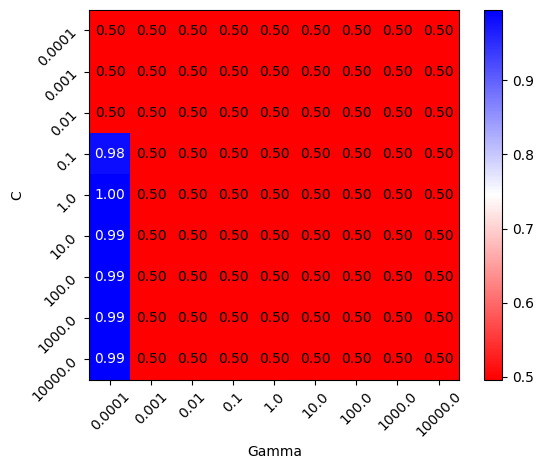

In [9]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("custom", ["red", "white", "blue"])

plt.imshow(history, cmap= cmap)
plt.colorbar()

for i in range(history.shape[0]):
    for j in range(history.shape[1]):
        plt.text(j, i, f"{history[i, j]:.2f}", ha="center", va="center", color="black" if history[i, j] < 0.8 else "white")
plt.ylabel("C")
plt.xlabel("Gamma")
plt.yticks(np.arange(9), candidate_C, rotation = 45)
plt.xticks(np.arange(9), candidate_gamma, rotation = 45)
plt.show()

## Q4

In [10]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
